# Compute Drawdowns

<AxesSubplot:>

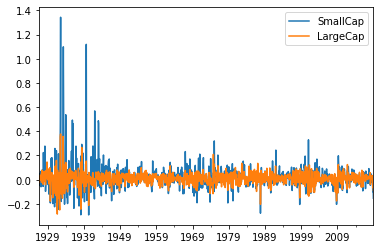

In [7]:
import pandas as pd
import numpy as np

me_m = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', 
                      header = 0, index_col=0, parse_dates = True, na_values=-99.99)

rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets / 100
rets.index = pd.to_datetime(rets.index, format = '%Y%m')
rets.index = rets.index.to_period('M')
rets.plot.line()

In [13]:
rets['1975'] #because we converted index to date time period

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


# Compute Drawdown

1. Compute wealth index
2. Compute previous peaks
3. compute drawdown as a %


In [16]:
wealth_index = 1000 * (1+rets['LargeCap']).cumprod()

In [18]:
previous_peaks = wealth_index.cummax()

In [21]:
drawdown = (wealth_index - previous_peaks) / previous_peaks

<AxesSubplot:>

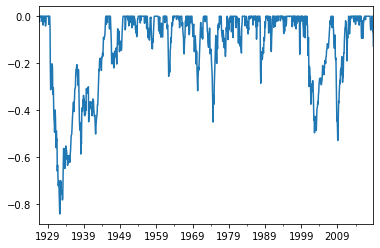

In [22]:
drawdown.plot()

In [23]:
drawdown.min() #neg numbers so want min

-0.8400375277943123

<AxesSubplot:>

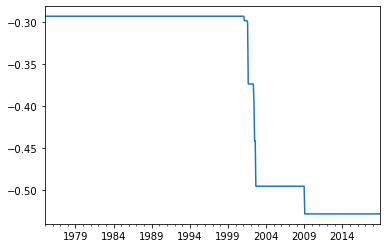

In [26]:
drawdown['1975':].cummin().plot()

In [27]:
drawdown['1975':].idxmin()

Period('2009-02', 'M')

In [30]:
#lets create a drawdown function

def Drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns.
    Computes and returns a DF that contains:
    wealth index
    previous peaks
    percent drawdowns
    """
    
    wealth_index = 1000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    
    return pd.DataFrame({
        'Wealth': wealth_index,
        'Peaks': previous_peaks,
        'Drawdown': drawdowns
    })

<AxesSubplot:>

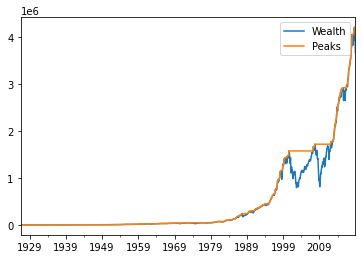

In [32]:
Drawdown(return_series=rets['LargeCap'])[['Wealth', 'Peaks']].plot()

<AxesSubplot:>

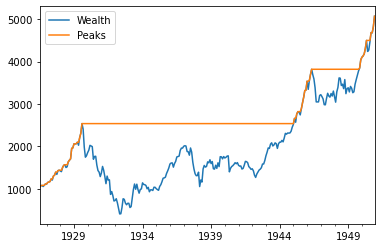

In [33]:
Drawdown(return_series=rets['LargeCap'])[:'1950'][['Wealth', 'Peaks']].plot()

In [38]:
Drawdown(return_series=rets['LargeCap'])['Drawdown'].min()

-0.8400375277943123

In [39]:
Drawdown(return_series=rets['SmallCap'])['Drawdown'].min()

-0.8330007793945303

In [40]:
print(Drawdown(return_series=rets['LargeCap'])['Drawdown'].idxmin())
print(Drawdown(return_series=rets['SmallCap'])['Drawdown'].idxmin())

1932-05
1932-05


In [42]:
Drawdown(return_series=rets['1940':]['SmallCap'])['Drawdown'].idxmin()

Period('1974-12', 'M')

In [45]:
print(Drawdown(return_series=rets['1975':]['SmallCap'])['Drawdown'].idxmin())
print(Drawdown(return_series=rets['1975':]['SmallCap'])['Drawdown'].min())

print(Drawdown(return_series=rets['1975':]['LargeCap'])['Drawdown'].idxmin())
print(Drawdown(return_series=rets['1975':]['LargeCap'])['Drawdown'].min())

2009-02
-0.6312068077252386
2009-02
-0.5280945042309303
